In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("../datasets/hotel_bookings_data.json")
df.head(5)

,adr,adults,agent,arrival_date_day_of_month,arrival_date_month,arrival_date_week_number,arrival_date_year,assigned_room_type,babies,booking_changes,...,meal,previous_bookings_not_canceled,previous_cancellations,required_card_parking_spaces,reservation_status,reservation_status_date,reserved_room_type,stays_in_weekend_nights,stays_in_week_nights,total_of_special_requests
0,160.20,2,378,1,May,7,2024,A,2,3,...,FB,0,1,2,Check-Out,1718236800000,B,2,1,1
1,220.97,3,434,11,February,23,2022,C,0,5,...,HB,4,0,0,Canceled,1647820800000,B,2,3,2
2,170.14,1,312,12,November,41,2022,B,2,5,...,FB,6,2,0,Canceled,1705104000000,C,2,1,3
3,114.29,2,127,30,August,48,2024,C,2,4,...,HB,10,3,2,Canceled,1729036800000,B,3,4,3
4,374.32,5,385,18,November,18,2022,C,0,2,...,HB,2,2,0,No-Show,1683676800000,C,0,4,2


# Limpieza

No hay filas duplicadas

- **adr**: Elminar valores nulos
- **adults**: No necesita limpieza
- **agent**: No necesita limpieza
- **arrival_date_day_of_month**: No necesita limpieza
- **arrival_date_month**: Eliminar INVALID_MONTH
- **arrival_date_week_number**: No necesita limpieza
- **arrival_date_year**: No necesita limpieza
- **assigned_room_type**: Eliminar valores XX
- **babies**: No necesita limpieza
- **booking_changes**: No necesita limpieza
- **children**: No necesita limpieza
- **company**: Eliminar fila/Eliminar valores nulos
- **country**: Eliminar INVALID_COUNTRY
- **customer_type**:No necesita limpieza
- **days_in_waiting_list**: No necesita limpieza
- **deposit_type**: Eliminar UNKNOWN
- **distribution_channel**: No necesita limpieza
- **hotel**: No necesita limpieza
- **is_canceled**: No necesita limpieza
- **is_repeated_guest**: No necesita limpieza
- **lead_time**: Reemplazar valores arriba del promedio por el promedio
- **market_segment**: No necesita limpieza
- **meal**: No necesita limpieza
- **previous_bookings_not_canceled**: No necesita limpieza
- **previous_cancellations**: No necesita limpieza
- **required_card_parking_spaces**: No necesita limpieza
- **reservation_status**: No necesita limpieza
- **reservation_status_date**: Transformar marcas de tiempo a fechas yyyy-mm-dd
- **reserved_room_type**: No necesita limpieza
- **stays_in_weekend_nights**: No necesita limpieza
- **stays_in_week_nights**: No necesita limpieza
- **total_of_special_requests**: No necesita limpieza

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   adr                             22463 non-null  float64
 1   adults                          25000 non-null  int64  
 2   agent                           25000 non-null  int64  
 3   arrival_date_day_of_month       25000 non-null  int64  
 4   arrival_date_month              25000 non-null  object 
 5   arrival_date_week_number        25000 non-null  int64  
 6   arrival_date_year               25000 non-null  int64  
 7   assigned_room_type              25000 non-null  object 
 8   babies                          25000 non-null  int64  
 9   booking_changes                 25000 non-null  int64  
 10  children                        25000 non-null  int64  
 11  company                         22463 non-null  float64
 12  country                         

In [52]:
print(f"Size of the dataset: {len(df)}")

Size of the dataset: 25000


In [53]:
df.describe()

,adr,adults,agent,arrival_date_day_of_month,arrival_date_week_number,arrival_date_year,babies,booking_changes,children,company,...,is_canceled,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,required_card_parking_spaces,reservation_status_date,stays_in_weekend_nights,stays_in_week_nights,total_of_special_requests
count,22463.000000,25000.00000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,22463.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000
mean,274.925900,2.99736,251.536400,15.85612,26.485760,2023.012720,0.993560,2.520200,1.49696,50.360103,...,0.497360,0.504160,182.120040,4.959880,2.499880,1.002280,1.711411e+12,1.490080,2.490680,1.492840
std,129.312421,1.41223,144.190365,8.86783,15.114157,0.816446,0.814926,1.706115,1.11866,28.867162,...,0.500003,0.499993,105.702709,3.162978,1.701257,0.817888,2.112691e+10,1.114572,1.701984,1.113121
min,50.020000,1.00000,1.000000,1.00000,1.000000,2022.000000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.641686e+12,0.000000,0.000000,0.000000
25%,163.925000,2.00000,126.000000,8.00000,13.000000,2022.000000,0.000000,1.000000,0.00000,26.000000,...,0.000000,0.000000,91.000000,2.000000,1.000000,0.000000,1.699142e+12,0.000000,1.000000,1.000000
50%,274.730000,3.00000,251.000000,16.00000,27.000000,2023.000000,1.000000,3.000000,1.00000,50.000000,...,0.000000,1.000000,182.000000,5.000000,3.000000,1.000000,1.717459e+12,1.000000,2.000000,1.000000
75%,385.595000,4.00000,378.000000,24.00000,40.000000,2024.000000,2.000000,4.000000,2.00000,75.000000,...,1.000000,1.000000,274.000000,8.000000,4.000000,2.000000,1.728691e+12,2.000000,4.000000,2.000000
max,499.990000,5.00000,500.000000,31.00000,52.000000,2024.000000,2.000000,5.000000,3.00000,100.000000,...,1.000000,1.000000,365.000000,10.000000,5.000000,2.000000,1.735603e+12,3.000000,5.000000,3.000000


In [54]:
df.isnull().sum()

adr                               2537
adults                               0
agent                                0
arrival_date_day_of_month            0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_year                    0
assigned_room_type                   0
babies                               0
booking_changes                      0
children                             0
company                           2537
country                              0
customer_type                        0
days_in_waiting_list                 0
deposit_type                         0
distribution_channel                 0
hotel                                0
is_canceled                          0
is_repeated_guest                    0
lead_time                            0
market_segment                       0
meal                                 0
previous_bookings_not_canceled       0
previous_cancellations               0
required_card_parking_spa

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df.dtypes

adr                               float64
adults                              int64
agent                               int64
arrival_date_day_of_month           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_year                   int64
assigned_room_type                 object
babies                              int64
booking_changes                     int64
children                            int64
company                           float64
country                            object
customer_type                      object
days_in_waiting_list                int64
deposit_type                       object
distribution_channel               object
hotel                              object
is_canceled                         int64
is_repeated_guest                   int64
lead_time                           int64
market_segment                     object
meal                               object
previous_bookings_not_canceled    

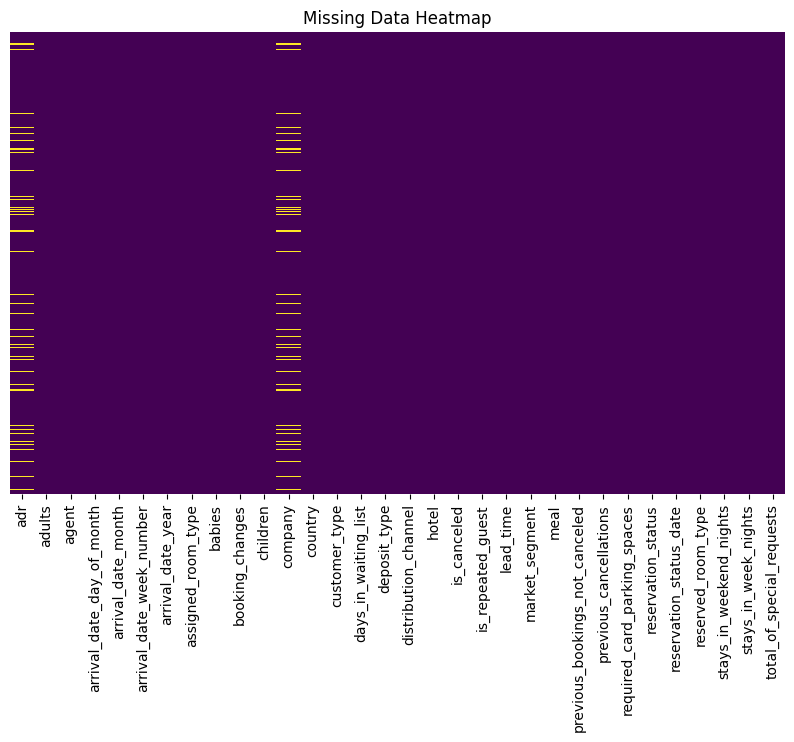

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   adr                             22463 non-null  float64
 1   adults                          25000 non-null  int64  
 2   agent                           25000 non-null  int64  
 3   arrival_date_day_of_month       25000 non-null  int64  
 4   arrival_date_month              25000 non-null  object 
 5   arrival_date_week_number        25000 non-null  int64  
 6   arrival_date_year               25000 non-null  int64  
 7   assigned_room_type              25000 non-null  object 
 8   babies                          25000 non-null  int64  
 9   booking_changes                 25000 non-null  int64  
 10  children                        25000 non-null  int64  
 11  company                         22463 non-null  float64
 12  country                         

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   adr                             22463 non-null  float64
 1   adults                          25000 non-null  int64  
 2   agent                           25000 non-null  int64  
 3   arrival_date_day_of_month       25000 non-null  int64  
 4   arrival_date_month              25000 non-null  object 
 5   arrival_date_week_number        25000 non-null  int64  
 6   arrival_date_year               25000 non-null  int64  
 7   assigned_room_type              25000 non-null  object 
 8   babies                          25000 non-null  int64  
 9   booking_changes                 25000 non-null  int64  
 10  children                        25000 non-null  int64  
 11  company                         22463 non-null  float64
 12  country                         

In [60]:
df['adr'].describe()

count    22463.000000
mean       274.925900
std        129.312421
min         50.020000
25%        163.925000
50%        274.730000
75%        385.595000
max        499.990000
Name: adr, dtype: float64

In [61]:
df['adults'].value_counts()

adults
3    5031
4    5025
1    5009
2    4981
5    4954
Name: count, dtype: int64

In [62]:
df['agent'].value_counts()

agent
410    82
325    70
205    68
56     67
351    66
       ..
381    35
199    35
20     32
316    32
160    28
Name: count, Length: 500, dtype: int64

In [63]:
df['arrival_date_day_of_month'].value_counts()

arrival_date_day_of_month
28    1034
30     915
12     859
21     851
3      849
10     843
20     841
11     837
24     837
23     832
9      825
15     824
1      821
6      819
5      819
19     815
8      813
27     813
4      808
22     803
18     798
2      795
13     787
26     785
17     776
7      769
16     767
14     764
25     757
29     693
31     451
Name: count, dtype: int64

In [64]:
df['arrival_date_month'].value_counts()

arrival_date_month
February         2750
January          2699
May              1965
March            1937
August           1909
December         1889
October          1866
November         1854
September        1851
July             1847
June             1800
April            1794
INVALID_MONTH     839
Name: count, dtype: int64

In [65]:
df['arrival_date_week_number'].value_counts()

arrival_date_week_number
48    547
41    532
4     529
7     520
6     516
2     514
12    509
17    504
26    503
32    502
29    501
36    499
22    499
44    498
35    497
51    496
3     495
10    492
52    491
28    490
46    488
11    487
42    487
33    486
47    484
21    484
18    483
50    477
38    473
23    471
37    471
27    467
5     465
8     465
31    465
1     464
9     464
25    464
39    463
15    463
45    461
16    460
49    460
14    456
43    455
13    455
24    453
34    453
20    446
40    443
30    429
19    424
Name: count, dtype: int64

In [66]:
df['arrival_date_year'].value_counts()

arrival_date_year
2024    8493
2023    8332
2022    8175
Name: count, dtype: int64

In [67]:
df['assigned_room_type'].value_counts()

assigned_room_type
X     5701
C     5646
A     5586
B     5530
XX    2537
Name: count, dtype: int64

In [68]:
df['babies'].value_counts()

babies
1    8397
0    8382
2    8221
Name: count, dtype: int64

In [69]:
df['booking_changes'].value_counts()

booking_changes
5    4264
3    4259
2    4191
4    4111
0    4093
1    4082
Name: count, dtype: int64

In [70]:
df['children'].value_counts()

children
0    6290
2    6260
3    6227
1    6223
Name: count, dtype: int64

In [71]:
df['company'].value_counts()

company
34.0    260
52.0    257
2.0     257
43.0    257
42.0    253
       ... 
33.0    201
10.0    200
98.0    192
21.0    190
67.0    187
Name: count, Length: 100, dtype: int64

In [72]:
df['country'].value_counts()

country
FRA                8118
GBR                7971
USA                7943
ESP                 507
INVALID_COUNTRY     461
Name: count, dtype: int64

In [73]:
df['customer_type'].value_counts()

customer_type
Transient-party    6329
Transient          6245
Contract           6229
Group              6197
Name: count, dtype: int64

In [74]:
df['days_in_waiting_list'].value_counts()

days_in_waiting_list
3     552
12    541
15    540
31    522
38    519
10    515
36    513
22    513
32    510
13    509
23    509
34    507
24    507
5     506
6     506
26    504
39    503
42    503
19    503
0     501
27    499
21    498
46    497
50    495
17    493
43    489
9     485
11    484
44    482
4     481
45    481
48    479
35    479
14    477
40    475
2     475
47    473
20    473
25    472
16    471
8     469
1     469
37    467
49    467
29    466
30    458
41    457
28    455
18    452
33    450
7     449
Name: count, dtype: int64

In [75]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    7541
Refundable    7463
Non Refund    7459
UNKNOWN       2537
Name: count, dtype: int64

In [76]:
df['distribution_channel'].value_counts()

distribution_channel
TA        8410
Direct    8344
TO        8246
Name: count, dtype: int64

In [77]:
df['hotel'].value_counts()

hotel
City Hotel      12511
Resort Hotel    12489
Name: count, dtype: int64

In [78]:
df['is_canceled'].value_counts()

is_canceled
0    12566
1    12434
Name: count, dtype: int64

In [79]:
df['is_repeated_guest'].value_counts()

is_repeated_guest
1    12604
0    12396
Name: count, dtype: int64

In [80]:
df['lead_time'].value_counts()

lead_time
25     95
130    89
192    88
40     87
199    87
       ..
17     50
280    50
243    50
318    49
241    49
Name: count, Length: 366, dtype: int64

In [81]:
df['market_segment'].value_counts()

market_segment
Corporate    8361
Online       8333
Offline      8306
Name: count, dtype: int64

In [82]:
df['meal'].value_counts()

meal
BB    6376
FB    6249
HB    6221
SC    6154
Name: count, dtype: int64

In [83]:
df['previous_bookings_not_canceled'].value_counts()

previous_bookings_not_canceled
0     2354
7     2351
3     2311
1     2299
4     2296
8     2254
2     2251
6     2244
10    2214
9     2214
5     2212
Name: count, dtype: int64

In [84]:
df['previous_cancellations'].value_counts()

previous_cancellations
3    4257
2    4179
1    4164
4    4156
0    4128
5    4116
Name: count, dtype: int64

In [85]:
df['required_card_parking_spaces'].value_counts()

required_card_parking_spaces
2    8390
0    8333
1    8277
Name: count, dtype: int64

In [86]:
df['reservation_status'].value_counts()

reservation_status
No-Show      8399
Check-Out    8356
Canceled     8245
Name: count, dtype: int64

In [87]:
df['reservation_status_date'].value_counts()

reservation_status_date
1735516800000    154
1735430400000    153
1735344000000    139
1735171200000    124
1734825600000    119
                ... 
1646524800000      1
1647388800000      1
1655856000000      1
1646956800000      1
1666224000000      1
Name: count, Length: 1068, dtype: int64

In [88]:
df['reserved_room_type'].value_counts()

reserved_room_type
C    8460
A    8311
B    8229
Name: count, dtype: int64

In [89]:
df['stays_in_weekend_nights'].value_counts()

stays_in_weekend_nights
1    6315
2    6281
0    6279
3    6125
Name: count, dtype: int64

In [90]:
df['stays_in_week_nights'].value_counts()

stays_in_week_nights
2    4269
1    4179
0    4152
4    4152
3    4149
5    4099
Name: count, dtype: int64

In [91]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
1    6373
2    6264
0    6223
3    6140
Name: count, dtype: int64

Correlación entre columnas numéricas

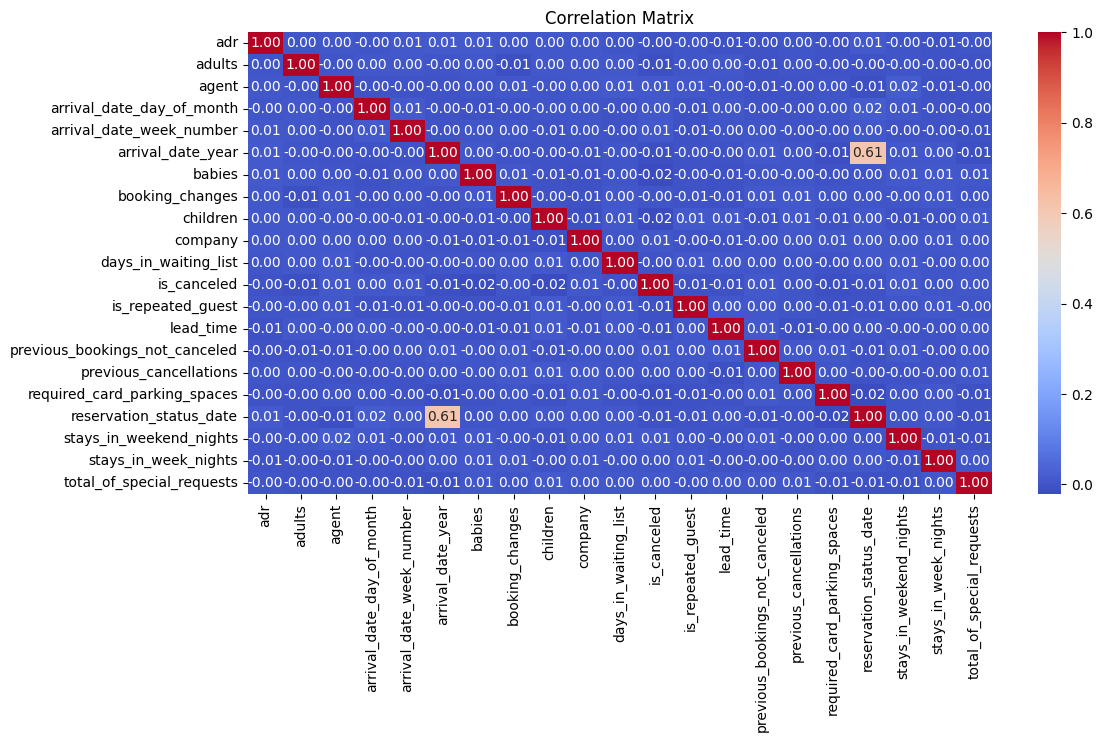

In [92]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()